# Predicting Tesla's Stock Price using Machine Learning

## 1. Problem Definition
> Explore the dataset and try to predict the stock price for the next month/year.

## 2. Data
The data is downloaded from Kaggle [Tesla Stock Price](https://www.kaggle.com/rpaguirre/tesla-stock-price). There is one csv file called Tesla.csv


## 3. Evaluation
Using LSTM


## 4. Features
Within the dataset one will encounter the following:
* The date - "Date"
* The opening price of the stock - "Open"
* The high price of that day - "High"
* The low price of that day - "Low"
* The closed price of that day - "Close"
* The amount of stocks traded during that day - "Volume"
* The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"

### Data exploration (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df0 = pd.read_csv('./datasets/stock-tesla.csv')
df0.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
# Check for missing values
df0.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
df0['Date']

0       6/29/2010
1       6/30/2010
2        7/1/2010
3        7/2/2010
4        7/6/2010
          ...    
1687    3/13/2017
1688    3/14/2017
1689    3/15/2017
1690    3/16/2017
1691    3/17/2017
Name: Date, Length: 1692, dtype: object

In [6]:
# Reload the dataset with parse dates
df0 = pd.read_csv('./datasets/stock-tesla.csv', parse_dates=['Date'])
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [7]:
df0.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
# Make a copy so we can manipulate the dataset
df = df0.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [10]:
len(df)

1692

In [11]:
# Renaming the columns
df.columns = ['date', 'open', 'high', 'low', 'close', 'vol', 'adj_close']
df.head()

,date,open,high,low,close,vol,adj_close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


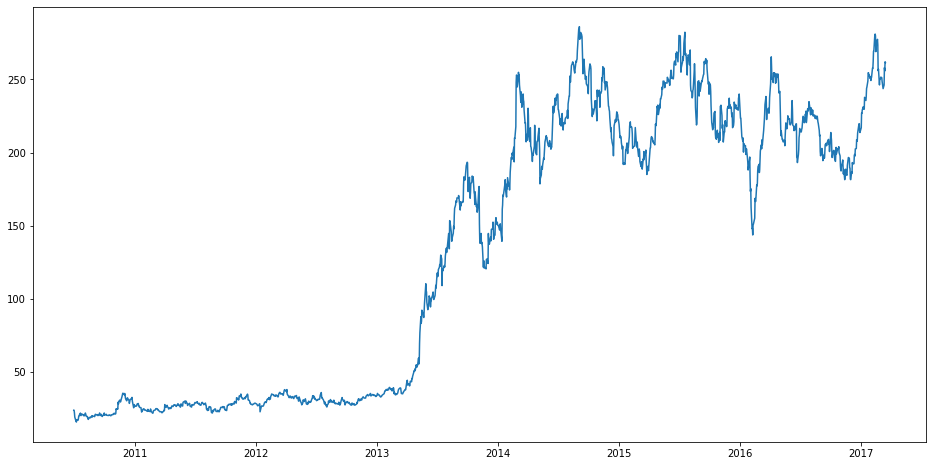

In [12]:
# Quick plot
plt.figure(figsize=(16,8))
plt.plot(df.date, df.close);

In [13]:
# Check unique values between close and adj_close
df_temp = df.copy()
df_temp['exists'] = df_temp.drop('close', axis=1).isin(df_temp['close']).any(1)
df_temp

,date,open,high,low,close,vol,adj_close,exists
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,True
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,True
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,True
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,True
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,True
...,...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,True
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,True
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,True
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,True


In [14]:
df_temp['exists'].nunique()

1

Turns out that the `close` attribute has the exact values as `adj_close`. We might as well drop one of them.

In [15]:
df.head()

,date,open,high,low,close,vol,adj_close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [16]:
df.drop('adj_close', axis=1, inplace=True)
df.head()

,date,open,high,low,close,vol
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


### Parse datetime
[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1692 non-null   datetime64[ns]
 1   open    1692 non-null   float64       
 2   high    1692 non-null   float64       
 3   low     1692 non-null   float64       
 4   close   1692 non-null   float64       
 5   vol     1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [18]:
df.date[:1]

0   2010-06-29
Name: date, dtype: datetime64[ns]

In [19]:
df.date.dt.day[:1]

0    29
Name: date, dtype: int64

In [20]:
df.date.dt.month[:1]

0    6
Name: date, dtype: int64

In [21]:
df.date.dt.year[:1]

0    2010
Name: date, dtype: int64

In [22]:
df.date.dt.dayofweek[:1] # 0=Monday, 6=Sunday

0    1
Name: date, dtype: int64

In [23]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['dayofweek'] = df.date.dt.dayofweek

In [24]:
df.head()

,date,open,high,low,close,vol,year,month,day,dayofweek
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,2
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,3
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,4
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,1


In [25]:
df.tail()

,date,open,high,low,close,vol,year,month,day,dayofweek
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,2017,3,13,0
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,2017,3,14,1
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,2017,3,15,2
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,2017,3,16,3
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,2017,3,17,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1692 non-null   datetime64[ns]
 1   open       1692 non-null   float64       
 2   high       1692 non-null   float64       
 3   low        1692 non-null   float64       
 4   close      1692 non-null   float64       
 5   vol        1692 non-null   int64         
 6   year       1692 non-null   int64         
 7   month      1692 non-null   int64         
 8   day        1692 non-null   int64         
 9   dayofweek  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 132.3 KB


## Long Short Term Memory (LSTM)

The most important features for time series, especially stock price prediting are `date` and `close`. So let's make a new dataframe

In [27]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]

In [28]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
new_data

,close
date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.2
2010-07-06,16.11
...,...
2017-03-13,246.17
2017-03-14,258
2017-03-15,255.73


In [29]:
new_data.value_counts()

close     
27.420000     4
33.900002     3
30.660000     3
26.959999     3
27.120001     3
             ..
208.690002    1
208.720001    1
208.789993    1
208.880005    1
15.800000     1
Length: 1528, dtype: int64

In [30]:
df.date.dt.year.value_counts()

2016    252
2015    252
2014    252
2013    252
2011    252
2012    250
2010    130
2017     52
Name: date, dtype: int64

We're going to split the data into training and validation sets where the training set is 2010-2016 and the validation set 2017

In [31]:
252*5+250+130

1640

In [32]:
df[:1640].tail()

,date,open,high,low,close,vol,year,month,day,dayofweek
1635,2016-12-23,208.000000,213.449997,207.710007,213.339996,4670500,2016,12,23,4
1636,2016-12-27,214.880005,222.250000,214.419998,219.529999,5915700,2016,12,27,1
1637,2016-12-28,221.529999,223.800003,217.199997,219.740005,3782500,2016,12,28,2
1638,2016-12-29,218.559998,219.199997,214.119995,214.679993,4045000,2016,12,29,3
1639,2016-12-30,216.300003,217.500000,211.679993,213.690002,4642600,2016,12,30,4


In [33]:
df[1640:].head()

,date,open,high,low,close,vol,year,month,day,dayofweek
1640,2017-01-03,214.860001,220.330002,210.960007,216.990005,5923300,2017,1,3,1
1641,2017-01-04,214.750000,228.000000,214.309998,226.990005,11213500,2017,1,4,2
1642,2017-01-05,226.419998,227.479996,221.949997,226.750000,5911700,2017,1,5,3
1643,2017-01-06,226.929993,230.309998,225.449997,229.009995,5527900,2017,1,6,4
1644,2017-01-09,228.970001,231.919998,228.000000,231.279999,3957000,2017,1,9,0


Manipulate the `new_data`

In [34]:
dataset = new_data.values

In [35]:
train = dataset[0:1640,:]
valid = dataset[1640:,:]
len(train), len(valid)

(1640, 52)

In [36]:
train[:5]

array([[23.889999],
       [23.83],
       [21.959999],
       [19.200001],
       [16.110001]], dtype=object)

In [37]:
valid[:5]

array([[216.99000499999997],
       [226.99000499999997],
       [226.75],
       [229.00999500000003],
       [231.27999900000003]], dtype=object)

In [38]:
# Import the libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

We're now going to take the first 60 data from `train` for testing

In [40]:
X_train, y_train = [], []
for i in range(60, len(train)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [41]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [42]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

1580/1580 - 23s - loss: 0.0033


In [43]:
# Predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [44]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [45]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [46]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

11.128333905666603

In [47]:
train = new_data[:1640]
valid = new_data[1640:]
valid['Predictions'] = closing_price

<ipython-input-47-3df96831c80e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


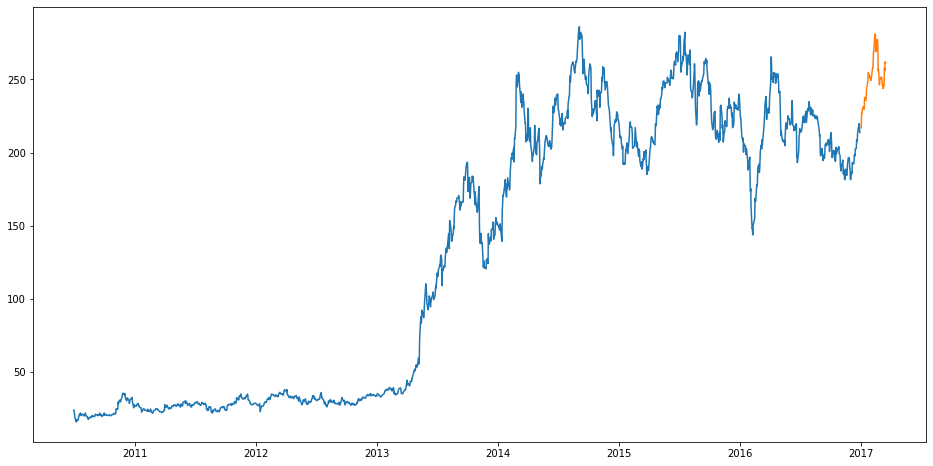

In [48]:
plt.figure(figsize=(16,8))
plt.plot(train['close'])
plt.plot(valid[['close']]);

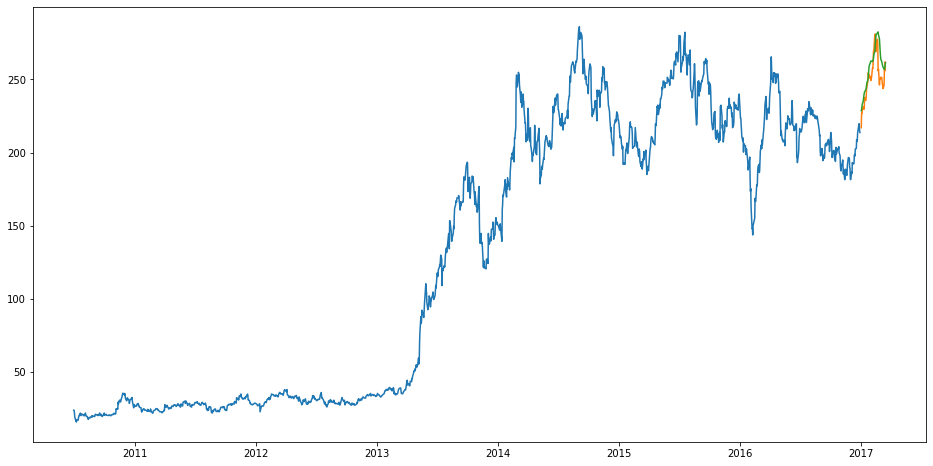

In [49]:
plt.figure(figsize=(16,8))
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']]);

In [51]:
X_test.shape

(52, 60, 1)

In [52]:
inputs.shape

(112, 1)